# EXCERCISE: Model Building and Scoring (LightGBM)

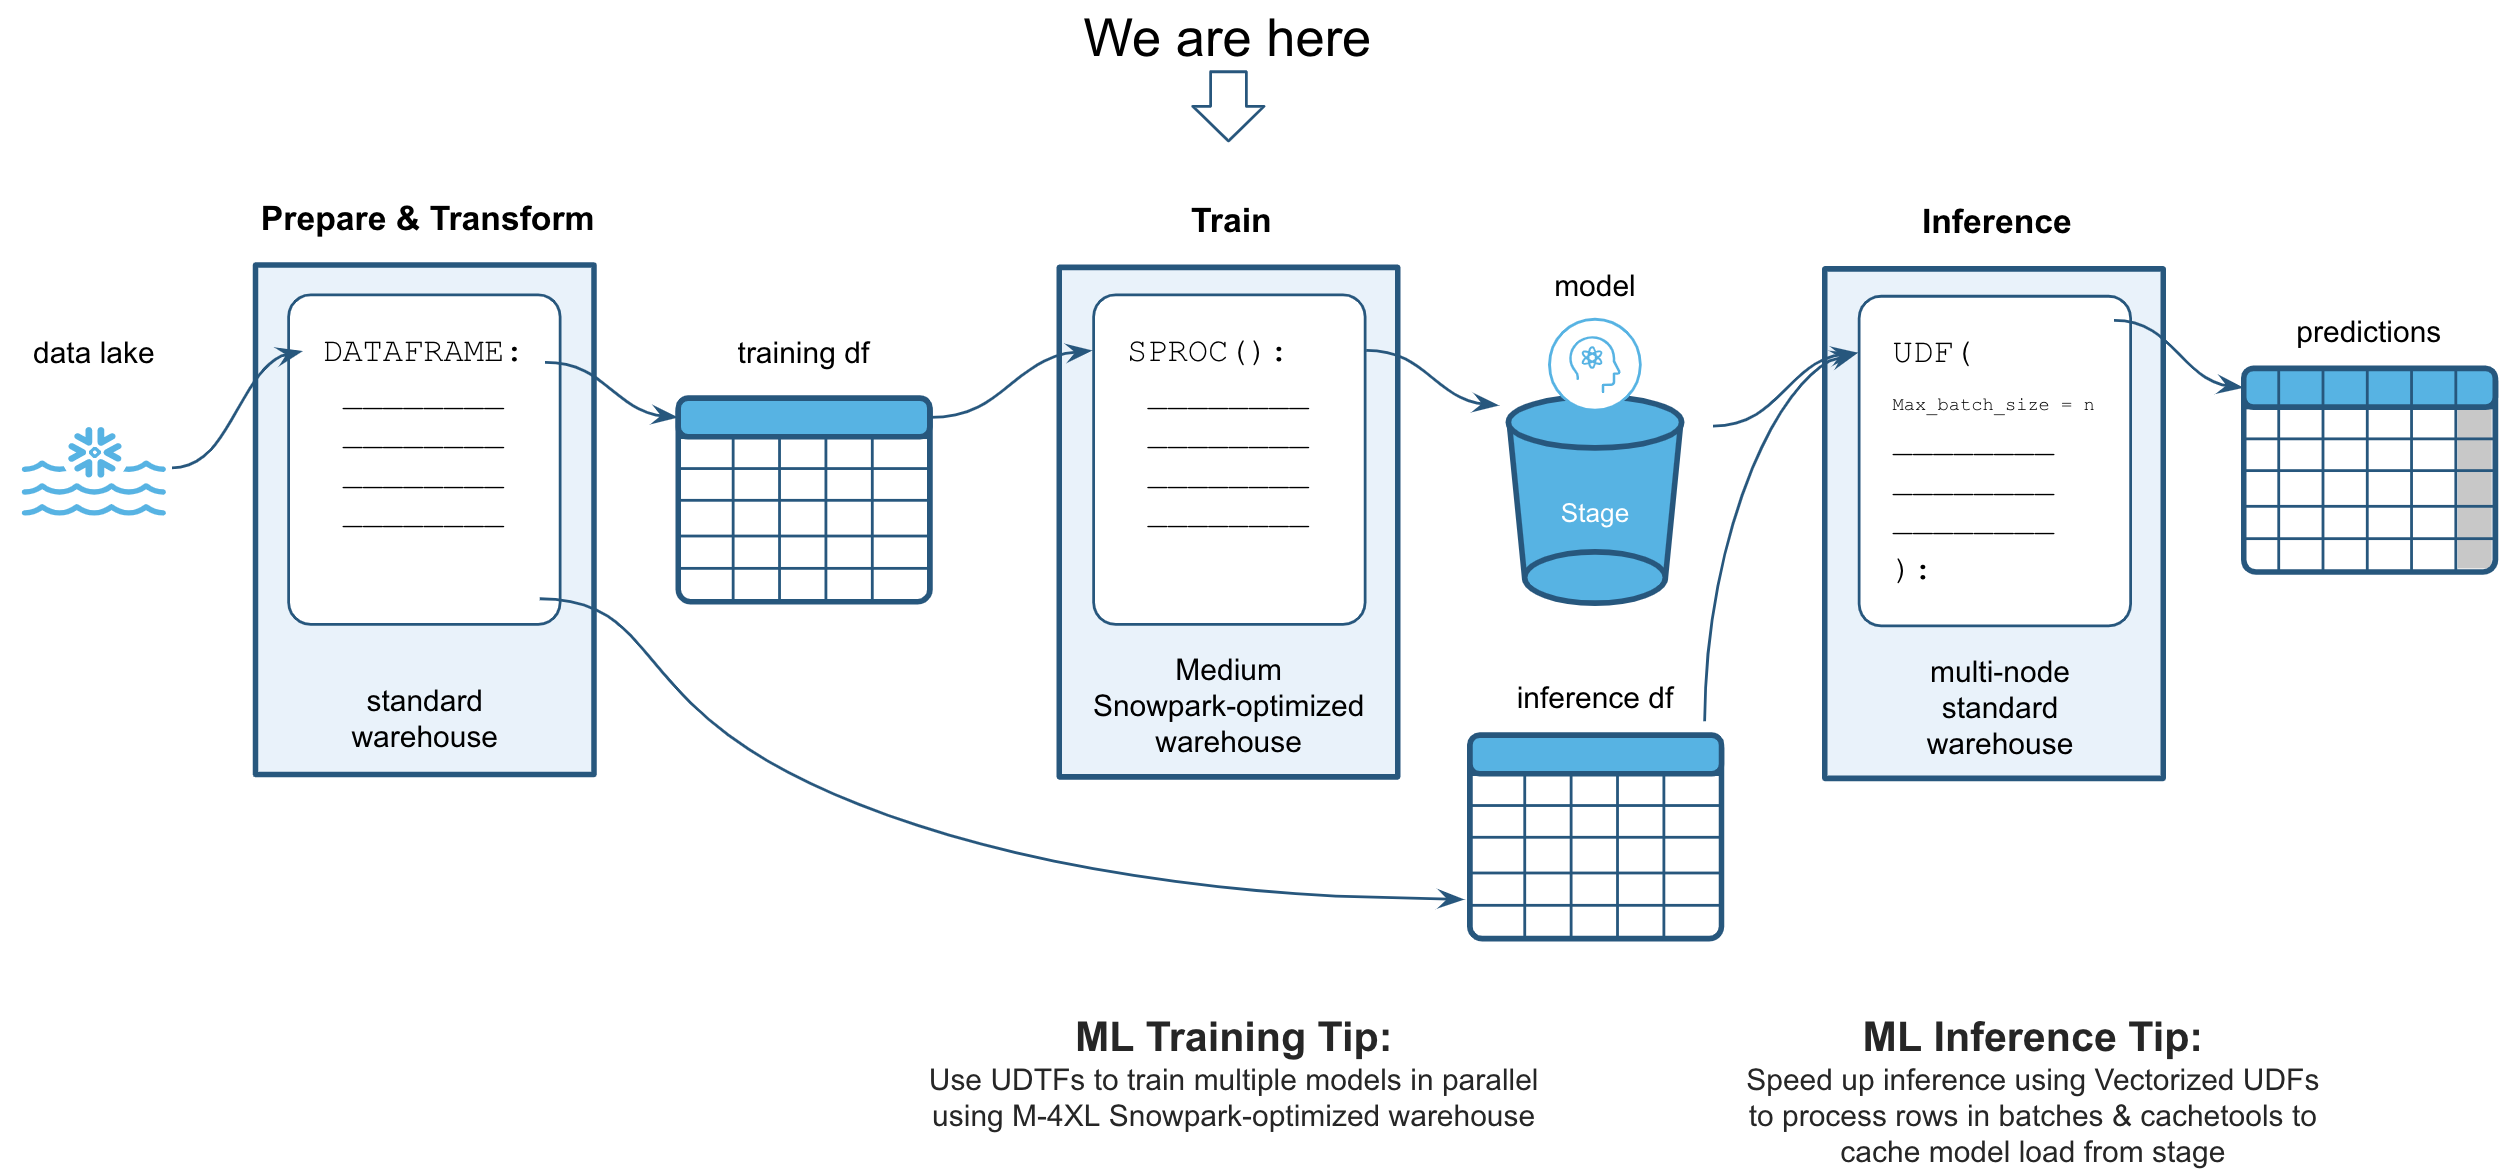

## Imports

In [1]:
from snowflake.snowpark.session import Session
import snowflake.snowpark.functions as F
import snowflake.snowpark.types as T
from snowflake.snowpark.window import Window
import preprocessing

import getpass
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Create Snowpark Session

In [2]:
accountname = getpass.getpass() # ORGNAME-ACCOUNTNAME (separated by minus sign)

········


In [3]:
username = getpass.getpass()    # SNOWFLAKE-USERNAME

········


In [4]:
password = getpass.getpass()    # SNOWFLAKE-PASSWORD

········


In [5]:
connection_parameters = {
    "account": accountname,
    "user": username,
    "password": password,
    "role": "ACCOUNTADMIN",
    "database": "HOL_DB",
    "schema": "PUBLIC",
    "warehouse": "HOL_WH"
}

session = Session.builder.configs(connection_parameters).create()

# Model Building

In [6]:
train_sdf = session.table('CREDIT_RISK_PREPARED_BALANCED_TRAIN')
test_sdf = session.table('CREDIT_RISK_PREPARED_BALANCED_TEST')

# EXERCISE: Define your Stored Procedure to train an LightGBM Model

In [7]:
# This local Python-function will be registered as a Stored Procedure and runs in Snowflake

def sproc_train_lightgbm_model(session: Session, 
                               training_table: str, 
                               feature_cols: list,
                               target_col: str,
                               model_name: str) -> T.Variant:
    
    # WORKFLOW
    # 1: Load data into Pandas DataFrame
    # 2: Define features and Label
    # 3: Train the model
    # 4: (Optional) Return feature importance
    # 5: Save the model and upload to Snowflake Stage
    # 6: Return feature importance or success-message
    # Hint: Make sure return is json-compatible (e.g. via calling to_dict())
    
    ##################################
    ## Insert your code after this  ##
    ##################################
    
    ##################################
    ## Insert your code before this ##
    ##################################

    return success_message

# EXERCISE: Register your Stored Procedure to train an LightGBM Model

In [8]:
# Registering the function as a Stored Procedure
sproc_train_lightgbm_model = session.sproc.register(func='YOUR_FUNCTION', 
                                                    name='NAME_OF_STORED_PROCEDURE', 
                                                    is_permanent=True, 
                                                    replace=True, 
                                                    stage_location='SNOWFLAKE_STAGE_FOR_MODELS', 
                                                    packages=['PACKAGE_DEPENDENCIES'])

# EXERCISE: Run your Stored Procedure to train an LightGBM Model

In [9]:
training_table = # YOUR TRAINING TABLE  #
feature_cols   = # YOUR FEATURE COLUMNS #
target_col     = # YOUR TARGET COLUMN   #
model_name     = # YOUR MODEL NAME      #

result = sproc_train_lightgbm_model(training_table, 
                                    feature_cols, 
                                    target_col,
                                    model_name, 
                                    session=session)
result

In [10]:
# The model is now stored in a Snowflake stage
pd.DataFrame(session.sql('LIST @SNOWFLAKE_STAGE_FOR_MODELS').collect())

,name,size,md5,last_modified
0,ml_models/logistic_reg_model.sav,2976,7972c9f6397142c6d084662dd8ba61e9,"Tue, 4 Oct 2022 10:40:45 GMT"
1,ml_models/xgboost_model.sav,541440,eaaf7580da36b13ef7ee341cfabf6035,"Tue, 4 Oct 2022 10:42:59 GMT"


# Model Scoring

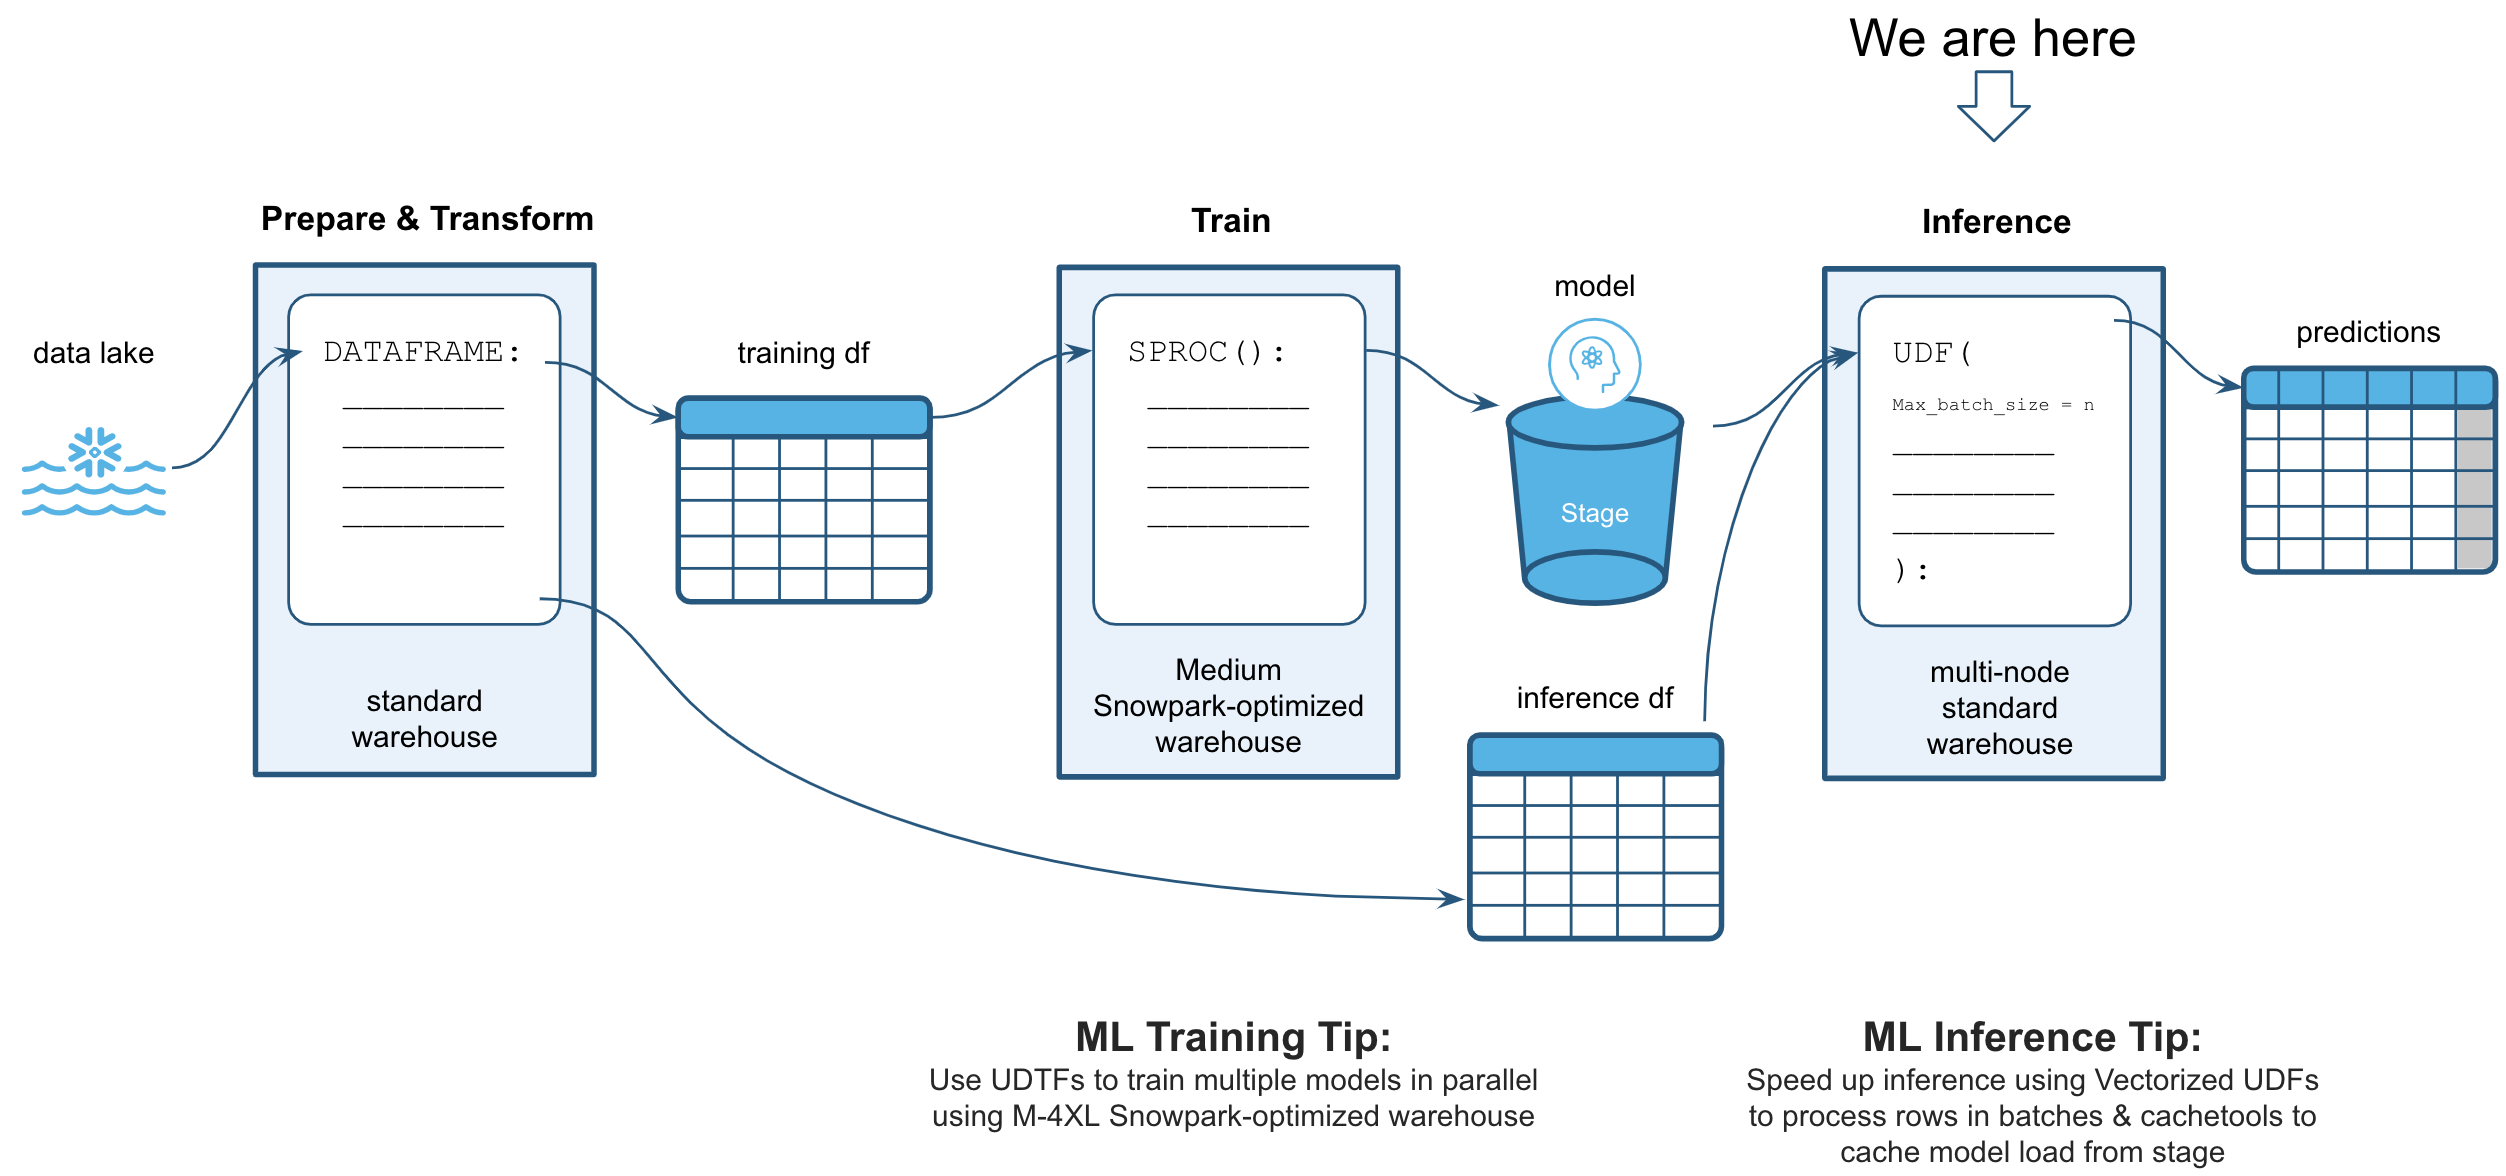

# EXERCISE: Define your UDF to Score an LightGBM Model

In [12]:
# Define a simple scoring function
from cachetools import cached

@cached(cache={})
def load_model(model_path: str) -> object:
    from joblib import load
    model = load(model_path)
    return model

def udf_score_logistic_lightgbm_model_vec_cached(df: pd.DataFrame) -> pd.Series:
    import os
    import sys
    # file-dependencies of UDFs are available in snowflake_import_directory
    IMPORT_DIRECTORY_NAME = "snowflake_import_directory"
    import_dir = sys._xoptions[IMPORT_DIRECTORY_NAME]
    
    # WORKFLOW
    # 1: Load the model from the import directory using load_model()
    # 2: Score the incoming DataFrame using model.predict()
    # 3: Return the scores as a variable scored_data
    
    ##################################
    ## Insert your code after this  ##
    ##################################

    ##################################
    ## Insert your code before this ##
    ##################################
    return scored_data

# EXERCISE: Register your UDF to Score an LightGBM Model

In [13]:
# Register UDF
udf_score_logistic_lightgbm_model_vec_cached = session.udf.register(func='YOUR_FUNCTION', 
                                                                    name='NAME_OF_UDF', 
                                                                    stage_location='SNOWFLAKE_STAGE_FOR_MODELS',
                                                                    input_types=[T.FloatType()]*len(feature_cols),
                                                                    return_type = T.FloatType(),
                                                                    replace=True, 
                                                                    is_permanent=True, 
                                                                    imports=['SNOWFLAKE_PATH_TO_MODEL'],
                                                                    packages=['PACKAGE_DEPENDENCIES'], 
                                                                    session=session)

# EXERCISE: Run your UDF to Score an LightGBM Model

In [14]:
%%time
# Scoring test data with scalar UDF but caching the model
scored_sdf = test_sdf.with_column('YOUR_PREDICTION_COLUMN', YOUR_UDF_NAME(*feature_cols))
scored_sdf.write.save_as_table(table_name='YOUR_PREDICTION_DATASET', mode='overwrite')

CPU times: user 10.7 ms, sys: 4.04 ms, total: 14.8 ms
Wall time: 3.89 s
